# Исследование исторических данных о продаже игр

  Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение общей информации и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# Для полного отображения таблиц
pd.set_option('display.max_columns', None)

In [ ]:
file_name = 'games.csv'

try:
    df = pd.read_csv(f'/datasets/{file_name}')
except:
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv(f'/content/drive/MyDrive/datasets/{file_name}')


data = df.copy()
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# Посмотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Приведём названия столбцов к нижнему регистру
data.columns = [i.lower() for i in data.columns]
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
# Посмотрим общее описание столбцов
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
# Посмотрим корреляцию
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
na_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
eu_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
jp_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


In [ ]:
print('Наблюдения:')

for column_name in data.columns:
  na_sum = data[column_name].isna().sum()
  data_type = data[column_name].dtypes

  if na_sum == 0:
    print(' - {} - пропусков нет (тип данных: {}) '.format(column_name, data_type))
  else:
    print(' - {} - {} пропус(-ка, -ков) (тип данных: {}) '.format(column_name, na_sum, data_type))

Наблюдения:
 - name - 2 пропус(-ка, -ков) (тип данных: object) 
 - platform - пропусков нет (тип данных: object) 
 - year_of_release - 269 пропус(-ка, -ков) (тип данных: float64) 
 - genre - 2 пропус(-ка, -ков) (тип данных: object) 
 - na_sales - пропусков нет (тип данных: float64) 
 - eu_sales - пропусков нет (тип данных: float64) 
 - jp_sales - пропусков нет (тип данных: float64) 
 - other_sales - пропусков нет (тип данных: float64) 
 - critic_score - 8578 пропус(-ка, -ков) (тип данных: float64) 
 - user_score - 6701 пропус(-ка, -ков) (тип данных: object) 
 - rating - 6766 пропус(-ка, -ков) (тип данных: object) 


**Наблюдения:**

 - Столбец name. Присутствуют пропуски. Скорее всего забыли зааполнить или ошибка при выгрузке данных. **Удалим** эти пропуски, чтобы они не влияли на нашу статистику
 - Столбец year_of_release. Тип данных float - необходимо заменить на int. Имеютс пропуски (269). Предположим, что данные не заполнены по техническим причинам или по причинам человеческого фактора. Удалим эти пропуски т.к. не можем их заполнить по другому
 - Столбец genre. Имеются пропуски. Причина - человеческий фактор. Удалим пропуски  в этом мтолбце
 - Столбец critic_score и user_score. Имеются пропуски и у столбца user_score тип данных object - заменить на float. Причина пропусков - выгрузка данных, либо оценка ещё не присвоена. Наши действия - заменим пропуски на мединнаые значения по платформам
 - Столбце rating. Имеются пропуски. Причина - человеческий фактор или ошибка при выгрузке. Удалатя не можем т.к. достаточно большое количество данных потеряется и жто отразится на нашу статистику, поэтому - заменяем на неопределённый рейтинг ("unknown")

In [ ]:
# Заменим значения tbd на NaN
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

# Удалим пропуски в столбцах name - year_of_release - genre
data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

# Заменим оценки критиков и пользователей на заглушку (-1)
data.loc[data['critic_score'].isna(), 'critic_score'] = -1
data.loc[data['user_score'].isna(), 'user_score'] = -1

# Заменим пропуски в столбце rating  на неизвестные
data['rating'] = data['rating'].replace(np.NaN, 'unknown')

# Изменим тип данных
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)

print(f'Доля от количества изначальных данных - {data.shape[0] / df.shape[0]}')

Доля от количества изначальных данных - 0.9837870176488184


**Наблюдение:**

Избавились от 2% данных.Зачение не превышет 10% - оставляем как есть

In [ ]:
# Проверям количество пропусков
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [ ]:
# Создаём новый столбец с суммой всех продаж
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


In [ ]:
# Количество явных дубликатов
data.duplicated().sum()

0

In [ ]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [ ]:
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [ ]:
data['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

**Вывод:**

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В блоке преобработки данных, мы
 - Изучили общую информацию по датасету, а именно
 - Обработали пропуски в столбцах
  - name , year_of_release, genre - пропуски удалены
  - critic_score, user_score - пропуски заменены на мединные значения по платформам
  - rating - пропуски заменены на зачения "unknown"
  Доля удалённых пропусков от изначальной выборки составила - 2%
 - Обработали спорные знчения
  - Столбец user_score - заменили зачения "tbd" на np.NaN
 - Изменили тип данных
  - year_of_release  |  float ---> int
  - user_score       |  object --> float
 - Создали новый столбец total_sales (сумма продаж всех регионов)
 - Проверили количество явных и неявных дубликатов - дубликатов не обнаружено


## Исследовательский анализ данных

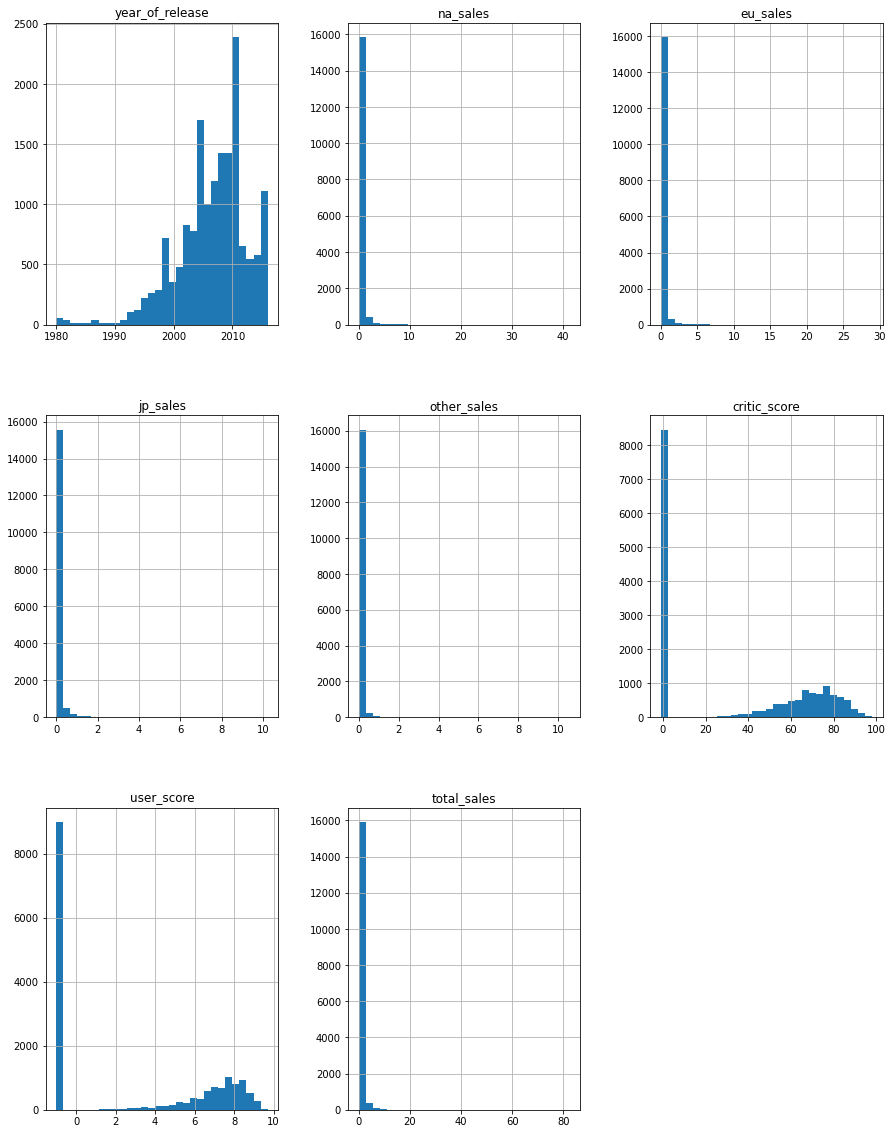

In [ ]:
data.hist(bins=30, figsize=(15,20));

In [ ]:
game_by_year = data.pivot_table(index='year_of_release', values=['name'], aggfunc=('count'))
game_by_year.columns = ['count']
game_by_year.sort_values(['count'], ascending=False)

,count
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


In [ ]:
# Всего продаж всех игра за все года
data['total_sales'].sum()

8814.369999999999

In [ ]:
# Первые 20 игр - лидеры продаж
data.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(20)

name
Wii Sports                        82.54
Grand Theft Auto V                56.58
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.38
Call of Duty: Modern Warfare 3    30.60
New Super Mario Bros.             29.80
Call of Duty: Black Ops II        29.40
Call of Duty: Black Ops           29.20
Wii Play                          28.91
New Super Mario Bros. Wii         28.32
Duck Hunt                         28.31
Call of Duty: Ghosts              27.39
Super Mario World                 26.09
Call of Duty: Black Ops 3         25.67
Call of Duty: Modern Warfare 2    24.97
Nintendogs                        24.67
Minecraft                         24.16
Name: total_sales, dtype: float64

In [ ]:
# Первые 10 платформ по количеству продаж
platform_lead = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
platform_lead

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

In [ ]:
platform_count = data.pivot_table(index='platform', values=['name'], aggfunc=('count'))
platform_count.columns = ['count']
platform_count = platform_count.sort_values(['count'], ascending=False)
platform_count

,count
platform,
PS2,2127
DS,2121
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957
GBA,811


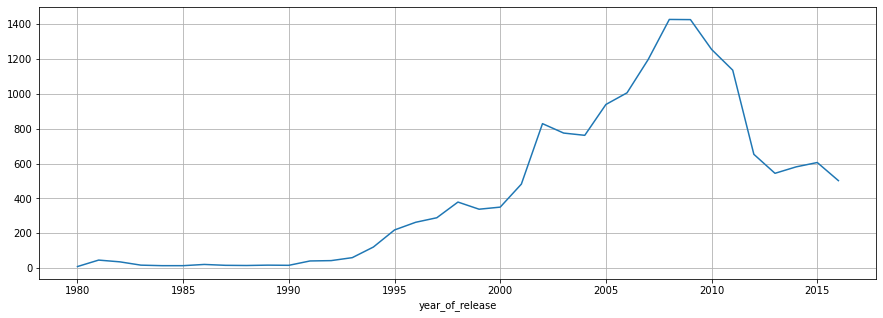

In [ ]:
data.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(15,5));

**Наблюдения:**

Пик продаж видеоигр наблюдался в диапазоне 2008 - 2010 годов. По графику можем сказать что игры до 2000 года нас не интересуют. Потому что и платформы того времени не актуальны и количество продаж значительно меньше, чем в будущие периоды

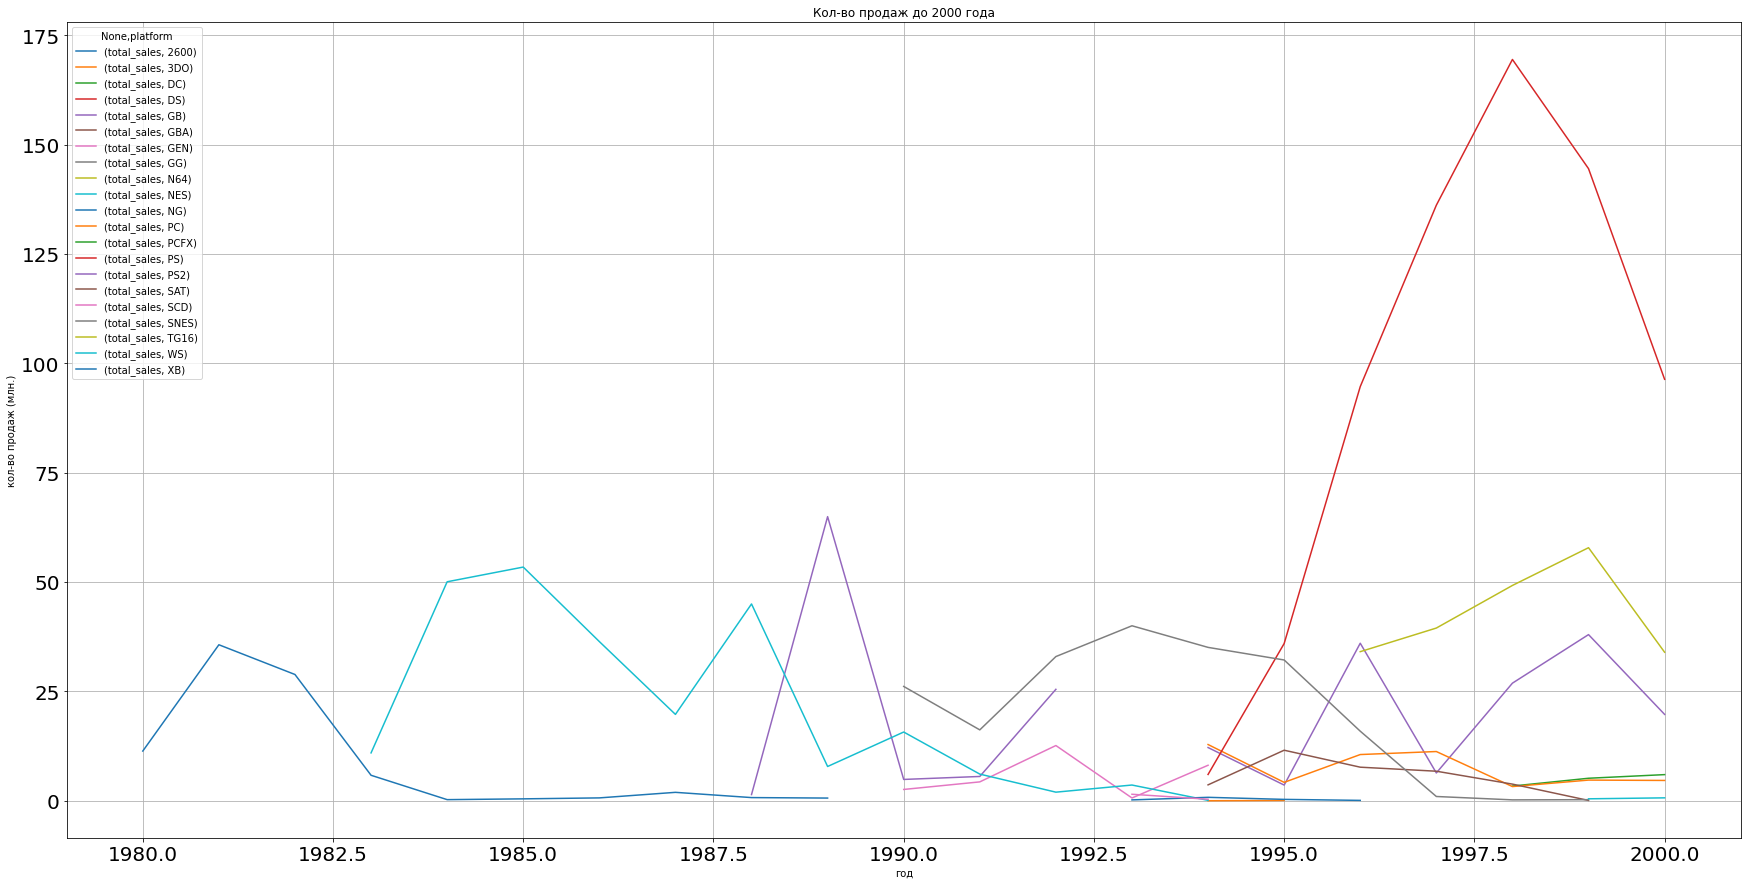

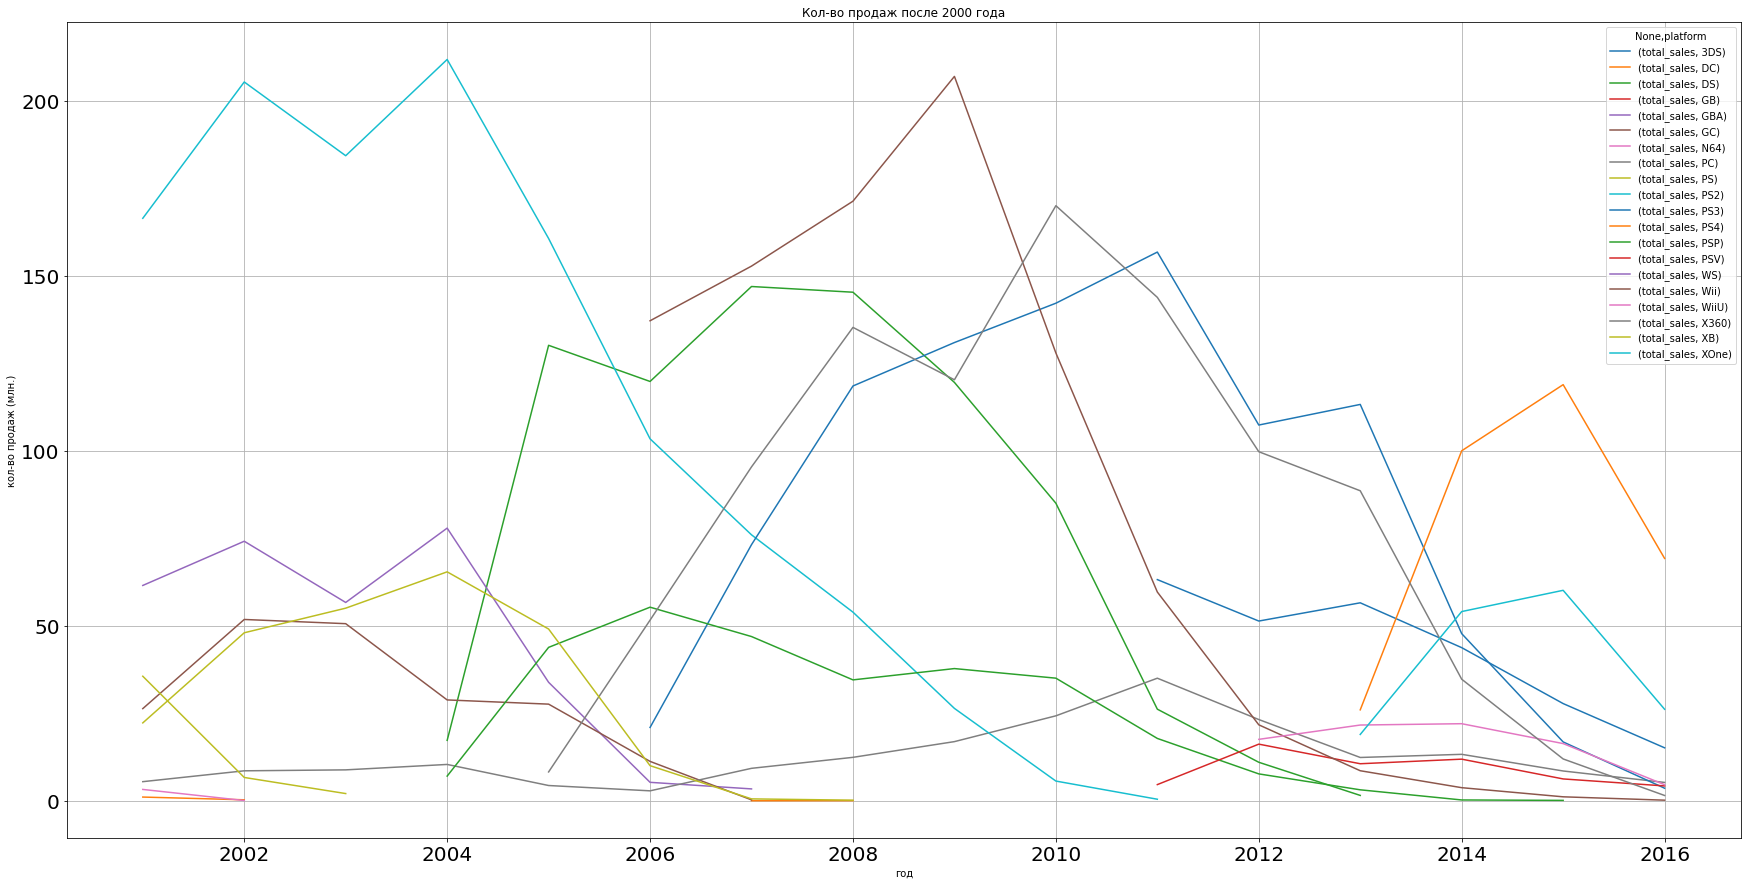

In [ ]:
# Посмотрим на всеь период продаж
data_before_2000 = data.query('year_of_release <= 2000')
data_after_2000 = data.query('year_of_release > 2000')

data_before_2000.pivot_table(index='year_of_release', columns='platform', values=['total_sales'], aggfunc='sum').plot(figsize=(30,15), legend='best', grid=True, title='Кол-во продаж до 2000 года', fontsize=20, xlabel='год', ylabel='кол-во продаж (млн.)');
data_after_2000.pivot_table(index='year_of_release', columns='platform', values=['total_sales'], aggfunc='sum').plot(figsize=(30,15), legend='best', grid=True, title='Кол-во продаж после 2000 года', fontsize=20, xlabel='год', ylabel='кол-во продаж (млн.)');

In [ ]:
# Количество продаж до 2000 года
data_before_2000.groupby('platform')['total_sales'].sum().sum()

1856.8799999999972

In [ ]:
# Количество продаж после 2000 года
data_after_2000.groupby('platform')['total_sales'].sum().sum()

6957.4899999999525

Вывод по циклам

In [ ]:
# Функция для определения жизненного цикла
def check_year(df, platform):
    first_year = df.query('platform == @platform')['year_of_release'].min()
    last_year = df.query('platform == @platform')['year_of_release'].max()
    period_of_live = last_year - first_year
    return period_of_live

In [ ]:
# Словарь по жизенным циклам для каждоый платформы
periods = {}
for platform in data['platform'].unique():
    periods[platform] = check_year(data, platform)
    # print(f'{platform} {check_year(data, platform)}')

periods

{'Wii': 10,
 'NES': 11,
 'GB': 13,
 'DS': 28,
 'X360': 11,
 'PS3': 10,
 'PS2': 11,
 'SNES': 9,
 'GBA': 7,
 'PS4': 3,
 '3DS': 5,
 'N64': 6,
 'PS': 9,
 'XB': 8,
 'PC': 31,
 '2600': 9,
 'PSP': 11,
 'XOne': 3,
 'WiiU': 4,
 'GC': 6,
 'GEN': 4,
 'DC': 10,
 'PSV': 5,
 'SAT': 5,
 'SCD': 1,
 'WS': 2,
 'NG': 3,
 'TG16': 0,
 '3DO': 1,
 'GG': 0,
 'PCFX': 0}

In [ ]:
# В среднем жизненныйй цикл одной платформы
np.mean(list(periods.values()))

7.612903225806452

Мы посчитали, что по тем данным, которыми мы омжем апперировать, средний жизенный цикл одной платформы составляет 7,6 лет. Эта цифра нам может помочь тем, что платформы, у которых к 2017 году срок существования подходит к 7-8 годам являются не актуальными для принятия решений. Хотя стоит отметить, что так судить мы модем только по тем платформам, объем продаж которых стремится к нулю. Так, PC существует уже 31 год и при этом, будет актуальной ещё много лет.

In [ ]:
# Посмотри за акутальный период (2016) - потому что прогнозируем на 2017 год
data_actual = data.query('2015 <= year_of_release <= 2016')

In [ ]:
# суммируем столбцы продаж и добавим результат в столбец total sales
data_actual.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().sort_values(by='total_sales', ascending=False)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS4,63.86,83.54,12.05,28.70,188.15
XOne,50.30,28.10,0.18,7.71,86.29
3DS,10.31,7.39,23.55,1.67,42.92
WiiU,8.86,6.49,4.12,1.48,20.95
PS3,5.66,7.30,4.97,2.49,20.42
PC,3.72,9.10,0.00,0.95,13.77
X360,8.05,4.21,0.00,1.22,13.48
PSV,0.54,1.08,8.41,0.47,10.50
Wii,0.49,0.73,0.00,0.10,1.32


**Наблдюдение**

Из данной выгрузки мы можем выделить две игровые платформы с наибольшими суммарными продажами. Выделим от 40 млн продаж - это платформы: Xbox One, PS4

**Наблюдения:**

График довольно объемный. Один из выводов - ничто не вечно. Давайте посмотрим на актальный для нас промежуток (2015-2016г.)

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал.

In [ ]:
data_actual_pivot = data_actual.pivot_table(index='year_of_release', columns='platform', values=['total_sales'], aggfunc='sum')
data_actual_pivot

total_sales                                                \
platform                3DS    PC    PS3     PS4   PSP   PSV   Wii   WiiU   
year_of_release                                                             
2015                  27.78  8.52  16.82  118.90  0.12  6.25  1.14  16.35   
2016                  15.14  5.25   3.60   69.25   NaN  4.25  0.18   4.60   

                               
platform          X360   XOne  
year_of_release                
2015             11.96  60.14  
2016              1.52  26.15

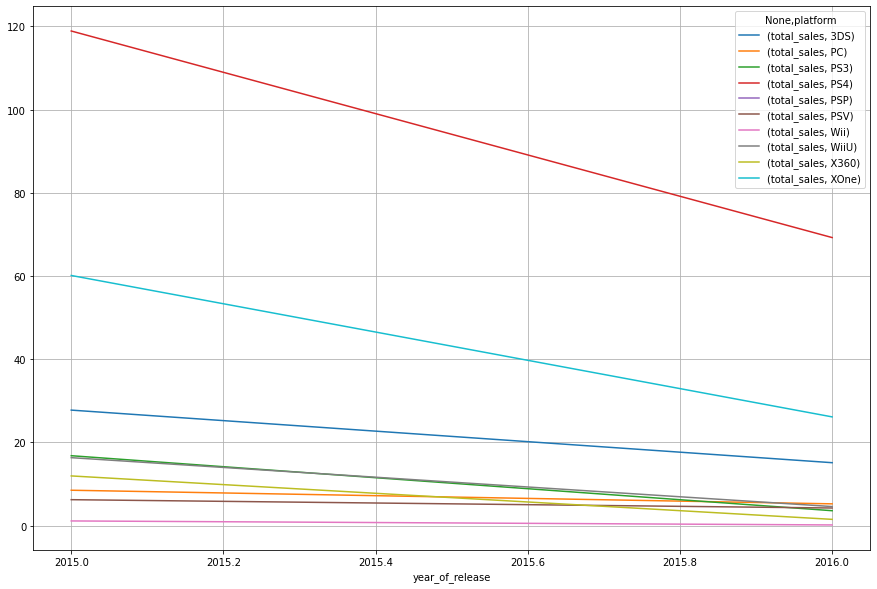

In [ ]:
data_actual_pivot.plot(figsize=(15,10), grid=True);

**Наблюдение:** 

Топ 3 по количеству продаж за  2015-2016 года
 - PS4
 - XOne
 - 3DS

Но стоит отметить: на всех платформах наблюдается снижение тендеции роста продаж. Так, с наименьшими "потерями" для рынка идут платформы 
 - PC 
 - PSV

In [ ]:
top_sales = data.query('(platform == ["PS4","XOne"]) and  (2015 <= year_of_release <= 2016)')
top_sales_pivot =  top_sales.pivot_table(index='year_of_release', columns='platform', values=['total_sales'], aggfunc='sum')
top_sales_pivot

total_sales       
platform                PS4   XOne
year_of_release                   
2015                 118.90  60.14
2016                  69.25  26.15

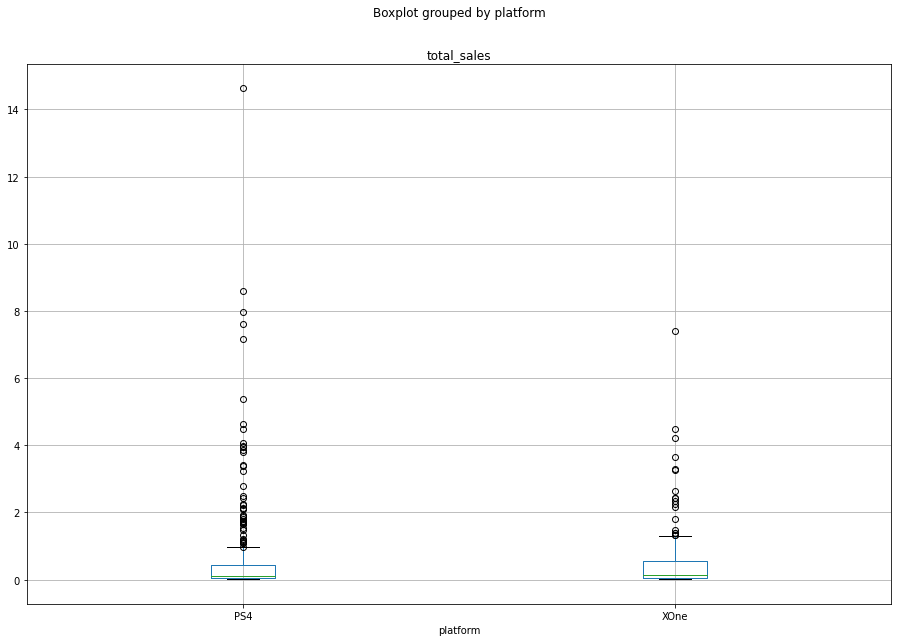

In [ ]:
# Построим общую диаграмму размаха
top_sales.boxplot(column='total_sales', by='platform', figsize=(15,10));

Построена диаграмма размаха за актуальный год под двум плафформам. На графике наблюдаются выбросы на двух платформах (2015-2016 года). Затрудняюсь ответить, что можно с ними делать, для полноты анализа предлагаю оставить

In [ ]:
top_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,unknown,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-1.0,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,-1.0,-1.0,unknown,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


In [ ]:
top_sales.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,301.0,0.625083,1.457063,0.01,0.050,0.12,0.420,14.63
XOne,167.0,0.516707,0.965940,0.01,0.035,0.13,0.555,7.39


In [ ]:
# Функция для расчета доли продаж в начале и конце года
def leave_part(df, platform_type):
    before = df.query('year_of_release == 2015 and platform == @platform_type')['total_sales'].sum()
    after = df.query('year_of_release == 2016 and platform == @platform_type')['total_sales'].sum()
    decrease = after / before - 1
    return abs(decrease)

In [ ]:
# На сколько упали продажи за год PS4
leave_part(top_sales, 'PS4')

0.41757779646761983

In [ ]:
# На сколько упали продажи за год XOne
leave_part(top_sales, 'XOne')

0.5651812437645493

In [ ]:
clear_data = top_sales.query('critic_score != -1 and user_score != -1')
top_sales_ps4 = clear_data.query('platform == "PS4"')
top_sales_xone = clear_data.query('platform == "XOne"')

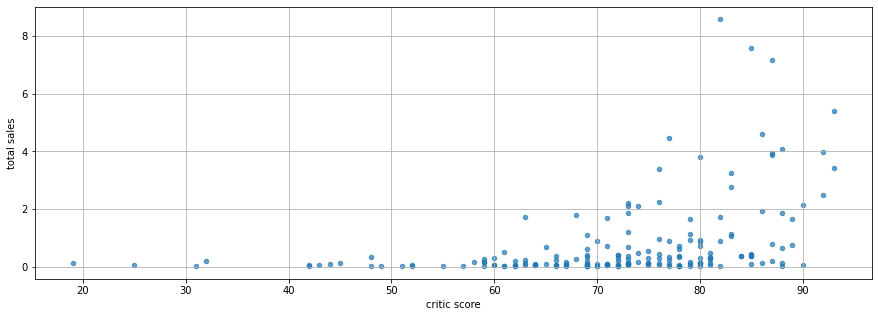

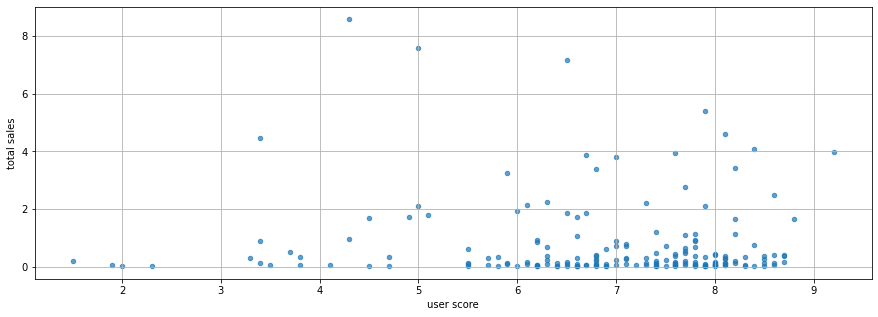

In [ ]:
# Зависимость количества продаж от оценки критиков на PS4
top_sales_ps4.plot(x='critic_score', y='total_sales', xlabel='critic score', ylabel='total sales', kind='scatter', grid=True, figsize=(15,5), alpha=0.7);

# Зависимость количества продаж от оценки пользователей на PS4
top_sales_ps4.plot(x='user_score', y='total_sales', xlabel='user score', ylabel='total sales', kind='scatter', grid=True, figsize=(15,5), alpha=0.7);

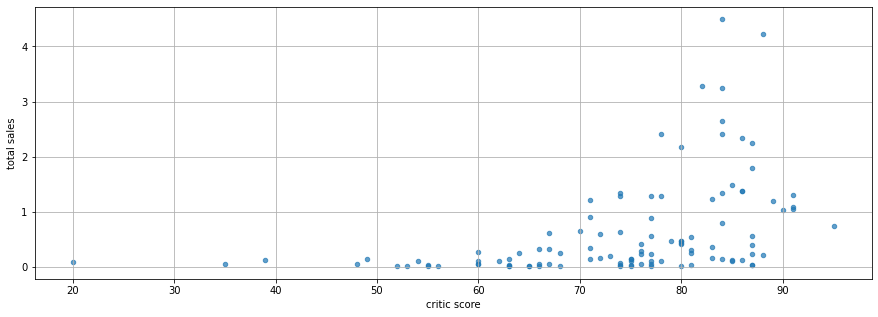

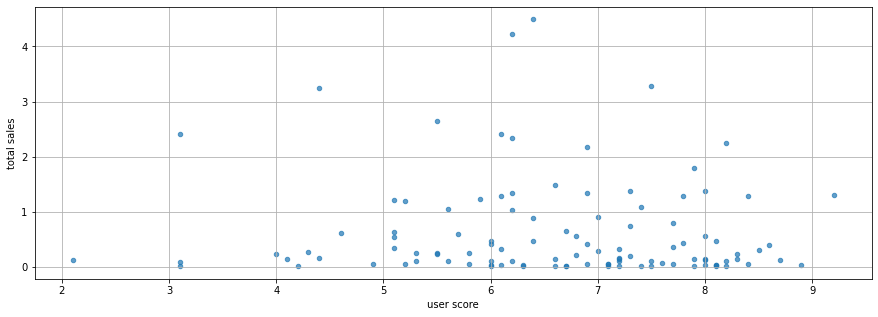

In [ ]:
# Зависимость количества продаж от оценки критиков на XOne
top_sales_xone.plot(x='critic_score', y='total_sales', xlabel='critic score', ylabel='total sales', kind='scatter', grid=True, figsize=(15,5), alpha=0.7);

# Зависимость количества продаж от оценки пользователей на XOne
top_sales_xone.plot(x='user_score', y='total_sales', xlabel='user score', ylabel='total sales', kind='scatter', grid=True, figsize=(15,5), alpha=0.7);

**Наблюдения:**

In [ ]:
# PS4
# Расчитаем зависимость от оценки критиков
print('Корреляция между общим количеством продаж и цоенкой критиков - положительная (платформа - PS4)')
print(top_sales_ps4['total_sales'].corr(top_sales_ps4['critic_score']))

print('___')
print()
# Расчитаем зависимость от оценки юзеров
print('Корреляция между общим количеством продаж и оценкой пользователей - слабоотрицательная (платформа - PS4)')
print(top_sales_ps4['total_sales'].corr(top_sales_ps4['user_score']))

Корреляция между общим количеством продаж и цоенкой критиков - положительная (платформа - PS4)
0.3920741369660568
___

Корреляция между общим количеством продаж и оценкой пользователей - слабоотрицательная (платформа - PS4)
-0.06436843081030288


In [ ]:
# XBox One
# Расчитаем зависимость от оценки критиков
print('Корреляция между общим количеством продаж и цоенкой критиков - положительная (платформа - XBox One)')
print(top_sales_xone['total_sales'].corr(top_sales_xone['critic_score']))

print('___')
print()
# Расчитаем зависимость от оценки юзеров
print('Корреляция между общим количеством продаж и оценкой пользователей - слабоотрицательная (платформа - XBox One)')
print(top_sales_xone['total_sales'].corr(top_sales_xone['user_score']))

Корреляция между общим количеством продаж и цоенкой критиков - положительная (платформа - XBox One)
0.4225192624742895
___

Корреляция между общим количеством продаж и оценкой пользователей - слабоотрицательная (платформа - XBox One)
-0.06868389218473443


**Наблюдение:**

Есть положительая зависимость продаж от оценки критиков (на обоих платформах).

Зависимость количества продаж от оценки пользователей не наблюдается (на обоих платформах).

**Вывод:**

По результатам данного блока можно сделать следующие выводы:
 - На протяжении с 2015 по 2016 года количество продаж видеоигр снижается порядка на 45%
 - Наиболее востребованные платформы среди пользователей - PS4 и XOne 

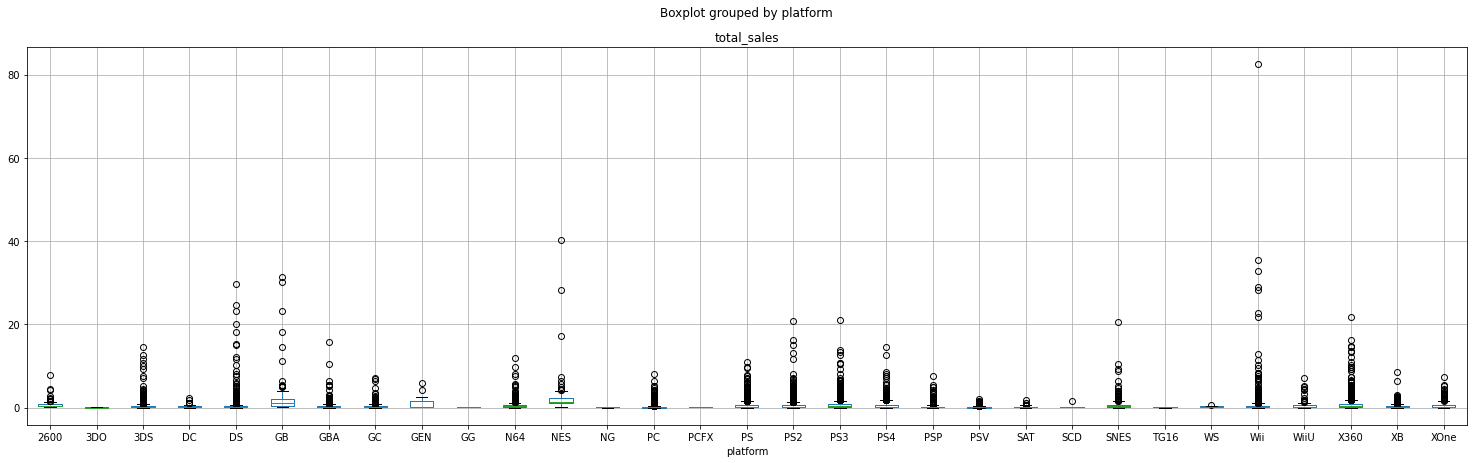

In [ ]:
# выводим диаграмму размаха общего плана
data.boxplot(column='total_sales', by='platform', figsize=(25,7));

**Наблюдение**

На диаграмме размаха заметны редкие выбросы. (очень популярная игра?) Так же наблюдаются выбросы в диапазоне от 20 до 40 млн. Попробуем их убрать и посмотреть на изменения

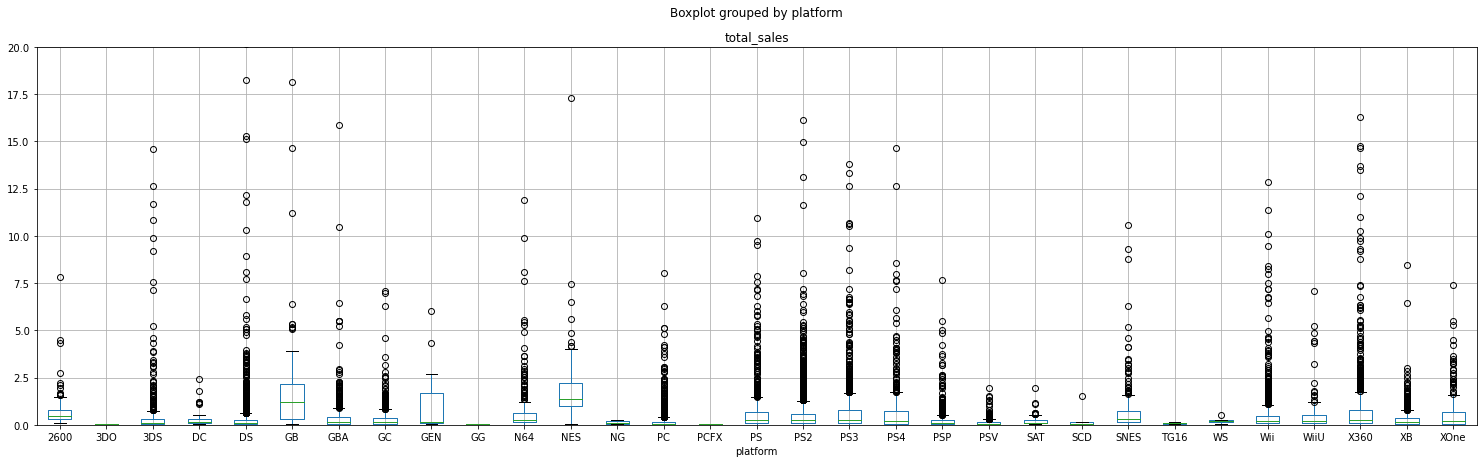

In [ ]:
# теперь сужаем диапазон до 20 млн продаж
data.boxplot(column='total_sales', by='platform', figsize=(25,7))
# сужаем данные по y
plt.ylim(0, 20)
plt.show()

**Наблюдение**

На диаграмме так же присутствуют выбросы, попроуем ещё уменьшить диапазон продаж

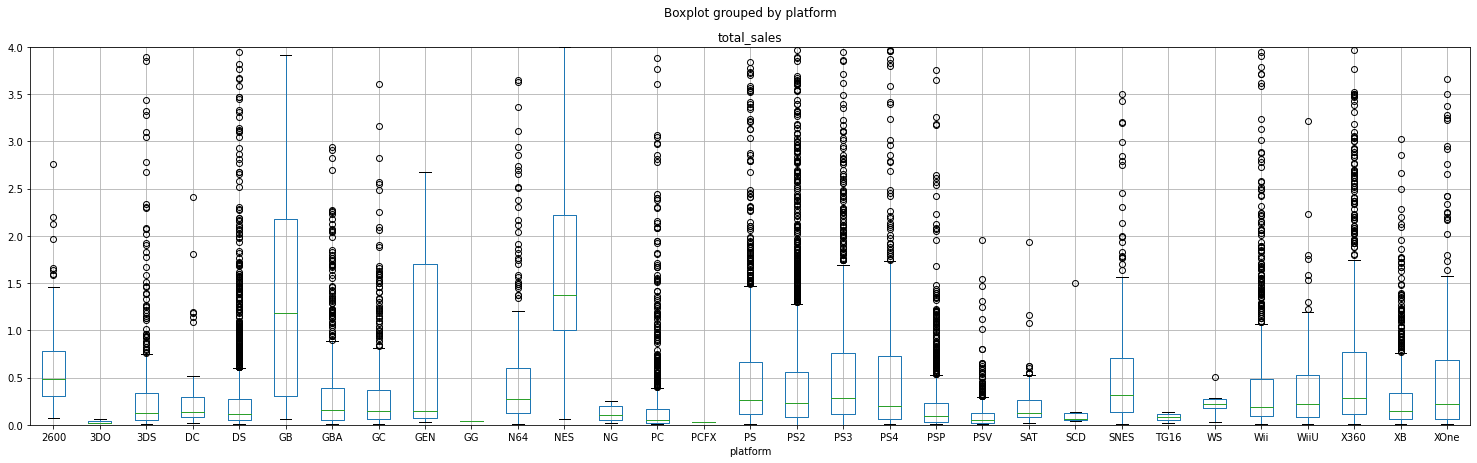

In [ ]:
# теперь сужаем диапазон до 4 млн продаж
data.boxplot(column='total_sales', by='platform', figsize=(25,7))
# сужаем данные по y
plt.ylim(0, 4)
plt.show()

**Наблюдение**

Можем выделить несколько платформ, которые выделяются: PS и PS4 и Xbox One. Границы этих платформ высокие, но при всем при этом медиана у всех платформ, кроме PS и PS3, не выходит за рамки 0.5 млн продаж, т.к. медиана и размах примерно на одном уровне, можно сказать, что у наших платформ, в отличии от тех, которые не попали в выборку есть намного больше игр, которые покупались намного чаще.

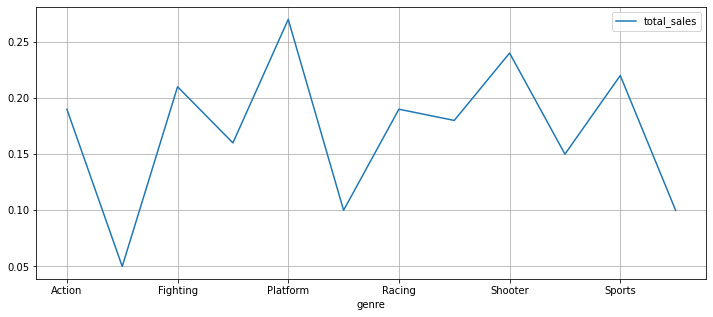

In [ ]:
# Посмотрим на общее распределение игр по жанрам.
(
data.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(grid=True, figsize=(12, 5))
)
plt.show()

Можно выделить ТОП-5 жанров:
1. Platform
2. Shooter
3. Sports
4. Fighting
5. Action

ТОП-5 самых непопулярных жанров:
1. Adventure
2. Puzzle
3. Strategy
4. Simulation
5. Misc

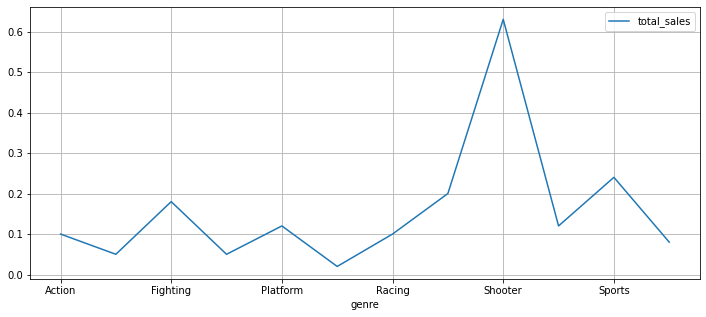

In [ ]:
# Посмотрим на распределение игр по жанрам в нашей выгрузке на 2016 год.
(
top_sales.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(grid=True, figsize=(12, 5))
)
plt.show()

Можно выделить ТОП-5 жанров:
1. Shooter
2. Sports
3. Role-Playing
4. Fighting
5. Platform

ТОП-5 самых непопулярных жанров:
1. Puzzle
2. Adventure
3. Misc
4. Strategy
5. Racing

**Вывод**

Жанры Fighting, Shooter, Sports занимают с первого по третье место как в общей выборке, так и в нашей финальной таблице, а вот 4 и 5 места разнятся (в нашей выгрузки это Simulation и Role-Playing)


Судя по диаграмме мы можем выделить ТОП-5 жанров:

Platform

Shooter

Sports

Fighting

Action

ТОП-5 самых непопулярных жанров:

Shooter

Sports

Role-Playing

Fighting

Platform

## Портрет пользователя каждого региона

In [ ]:
# Функция для построения графиков по регионам и необходимому столбцу
def user_portrait(df, figure, region, title_name):
  main = df.groupby(figure)[region].sum().sort_values(ascending=False).head()
  return main.plot(x=figure, y='sum', kind='bar', ylabel='Количество продаж', title=title_name ,figsize=(15,5), grid=True);

**Портрет пользователя в Северной Америке**

<AxesSubplot:title={'center':'ТОП 5 платформ в Северной Америке (2015-2016)'}, xlabel='platform', ylabel='Количество продаж'>

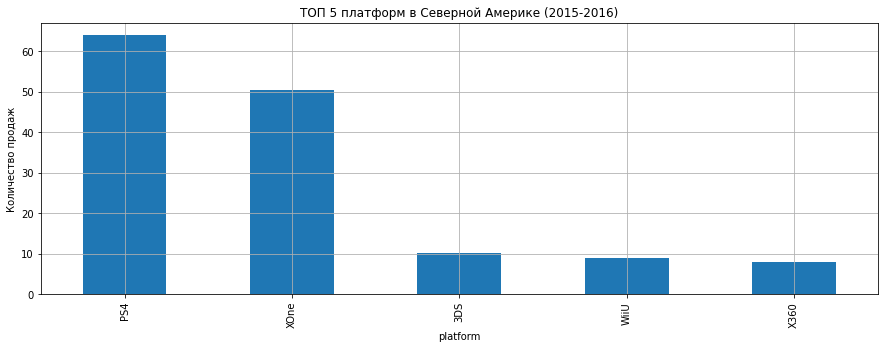

In [ ]:
user_portrait(data_actual, 'platform', 'na_sales', 'ТОП 5 платформ в Северной Америке (2015-2016)')

<AxesSubplot:title={'center':'ТОП 5 жанров в Северной Америке (2015-2016)'}, xlabel='genre', ylabel='Количество продаж'>

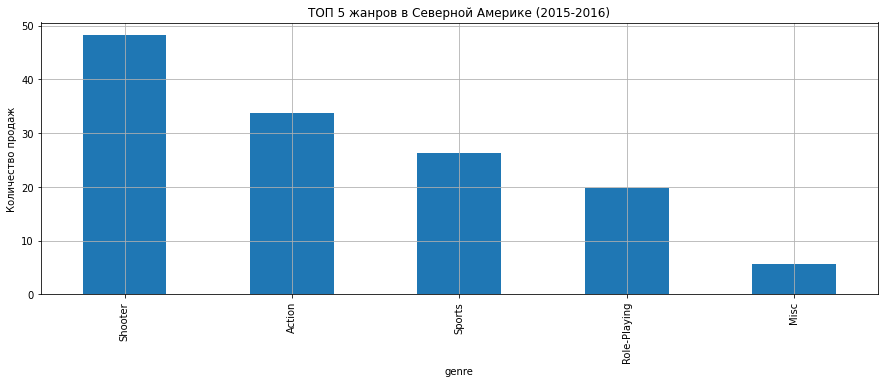

In [ ]:
user_portrait(data_actual, 'genre', 'na_sales', 'ТОП 5 жанров в Северной Америке (2015-2016)')

<AxesSubplot:title={'center':'ТОП 5 рейтингов в Северной Америке (2015-2016)'}, xlabel='rating', ylabel='Количество продаж'>

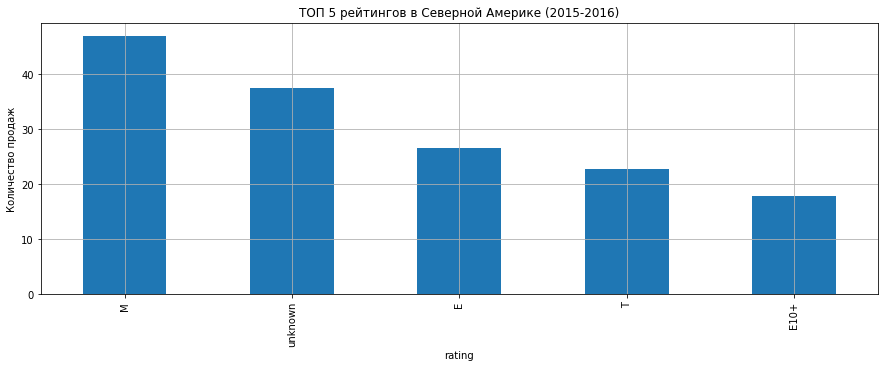

In [ ]:
user_portrait(data_actual, 'rating', 'na_sales', 'ТОП 5 рейтингов в Северной Америке (2015-2016)')

**Наблюдение**

Пользователь Северной Америки:

Топ 3 платформы:
 - PS4
 - XOne
 - DS

Топ 3 Жанра
 - Shooter
 - Action
 - Sports

**Портрет пользователя в Европе**

<AxesSubplot:title={'center':'ТОП 5 платформ в Европе (2015-2016)'}, xlabel='platform', ylabel='Количество продаж'>

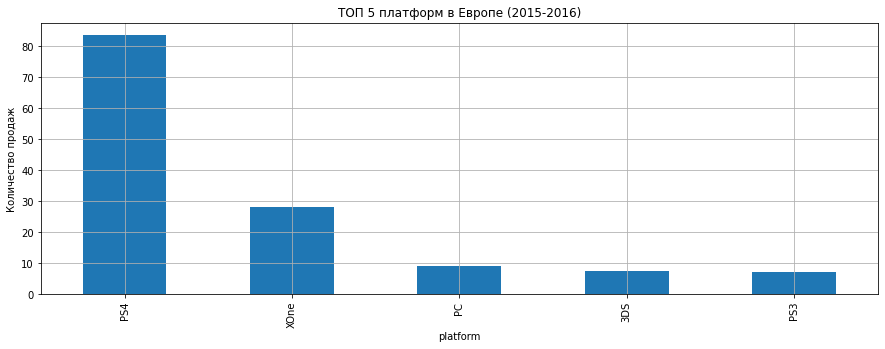

In [ ]:
user_portrait(data_actual, 'platform', 'eu_sales', 'ТОП 5 платформ в Европе (2015-2016)')

<AxesSubplot:title={'center':'ТОП 5 жанров в Европе (2015-2016)'}, xlabel='genre', ylabel='Количество продаж'>

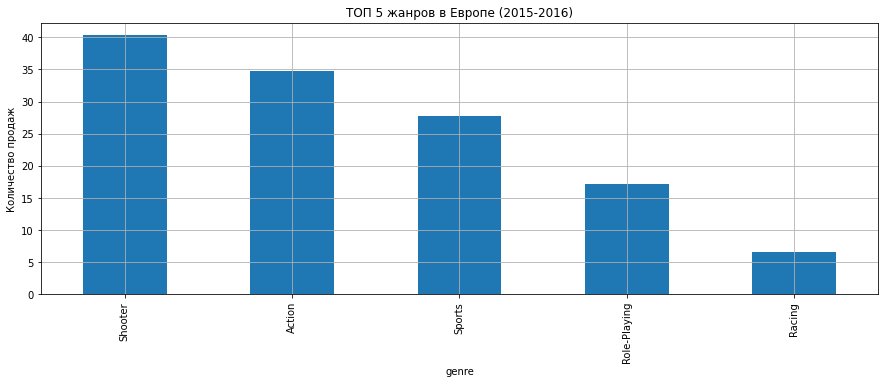

In [ ]:
user_portrait(data_actual, 'genre', 'eu_sales', 'ТОП 5 жанров в Европе (2015-2016)')

<AxesSubplot:title={'center':'ТОП 5 рейтингов в Европе (2015-2016)'}, xlabel='rating', ylabel='Количество продаж'>

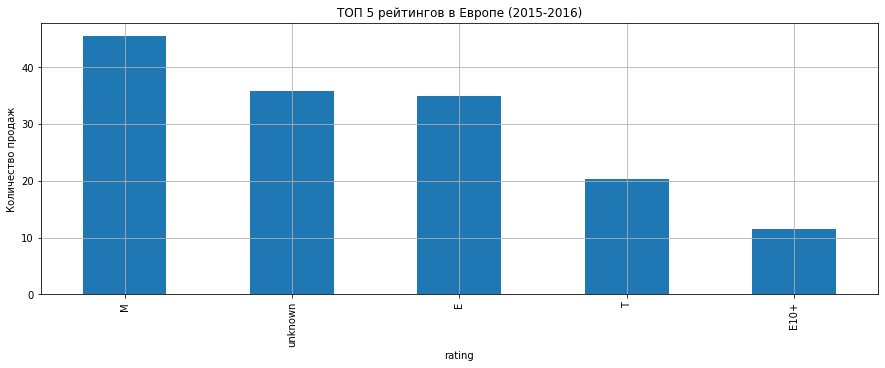

In [ ]:
user_portrait(data_actual, 'rating', 'eu_sales', 'ТОП 5 рейтингов в Европе (2015-2016)')

**Наблюдение**

Пользователь Европе:

Топ 3 платформы:
 - PS4
 - XOne
 - PC

Топ 3 Жанра
 - Shooter
 - Action
 - Sports

**Портрет пользователя в Японии**

<AxesSubplot:title={'center':'ТОП 5 платформ в Японии (2015-2016)'}, xlabel='platform', ylabel='Количество продаж'>

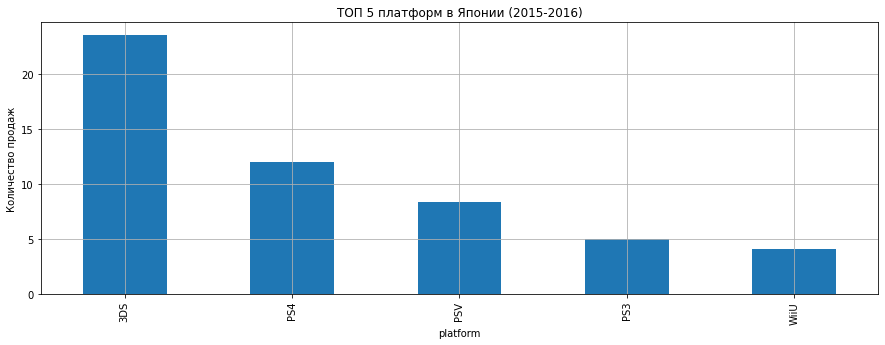

In [ ]:
user_portrait(data_actual, 'platform', 'jp_sales', 'ТОП 5 платформ в Японии (2015-2016)')

<AxesSubplot:title={'center':'ТОП 5 жанров в Японии (2015-2016)'}, xlabel='genre', ylabel='Количество продаж'>

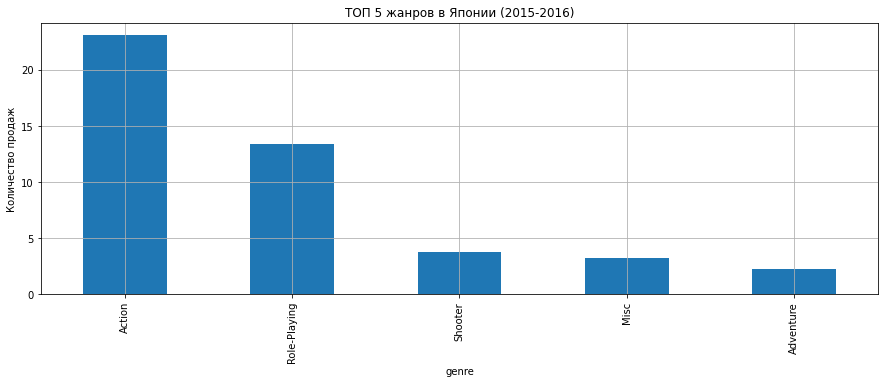

In [ ]:
user_portrait(data_actual, 'genre', 'jp_sales', 'ТОП 5 жанров в Японии (2015-2016)')

<AxesSubplot:title={'center':'ТОП 5 рейтингов в Японии (2015-2016)'}, xlabel='rating', ylabel='Количество продаж'>

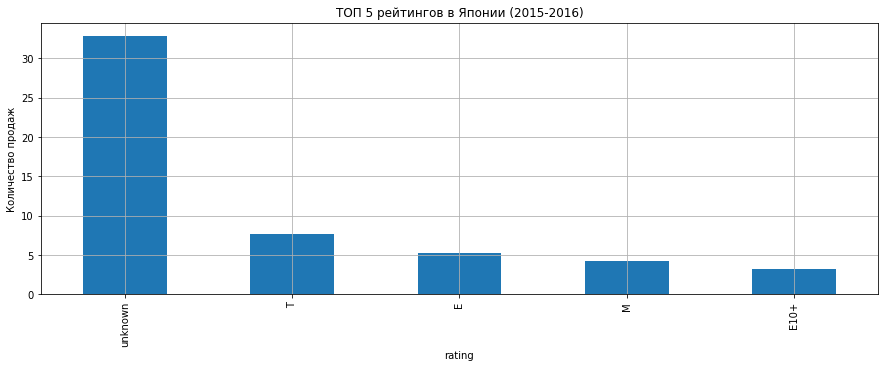

In [ ]:
user_portrait(data_actual, 'rating', 'jp_sales', 'ТОП 5 рейтингов в Японии (2015-2016)')

**Наблюдение**

Пользователь Японии:

Топ 3 платформы:
 - DS
 - PS4
 - PSV

Топ 3 Жанра
 - ACtion
 - RP
 - Shooter

**Портрет пользователя в остальных решионах**

<AxesSubplot:title={'center':'ТОП 5 платформ в Остальных регионах (2015-2016)'}, xlabel='platform', ylabel='Количество продаж'>

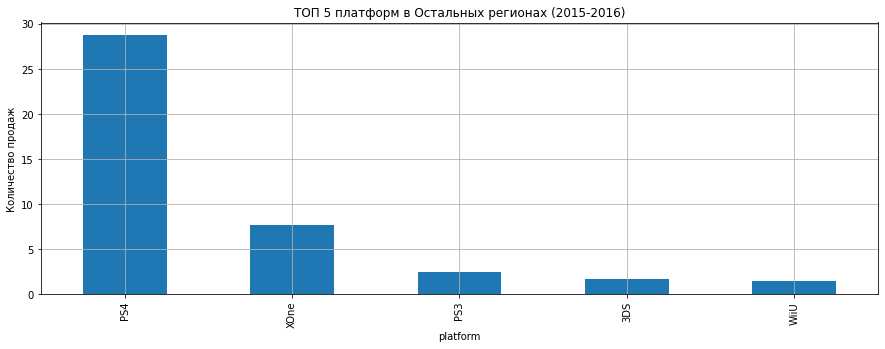

In [ ]:
user_portrait(data_actual, 'platform', 'other_sales', 'ТОП 5 платформ в Остальных регионах (2015-2016)')

<AxesSubplot:title={'center':'ТОП 5 жанров в Остальных регионах (2015-2016)'}, xlabel='genre', ylabel='Количество продаж'>

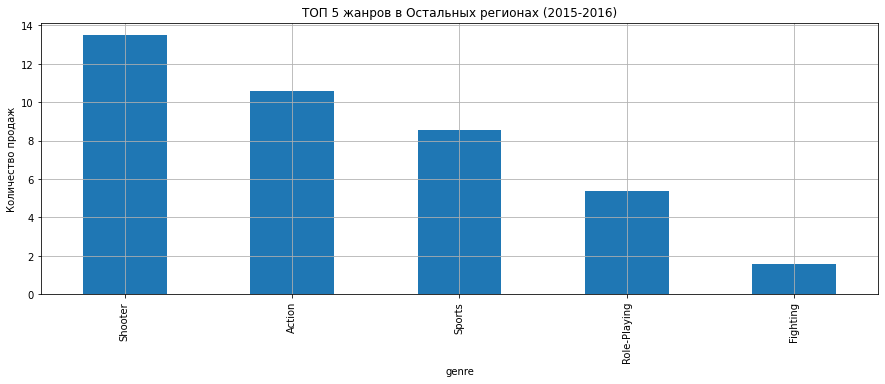

In [ ]:
user_portrait(data_actual, 'genre', 'other_sales', 'ТОП 5 жанров в Остальных регионах (2015-2016)')

<AxesSubplot:title={'center':'ТОП 5 рейтингов в Остальных регионах (2015-2016)'}, xlabel='rating', ylabel='Количество продаж'>

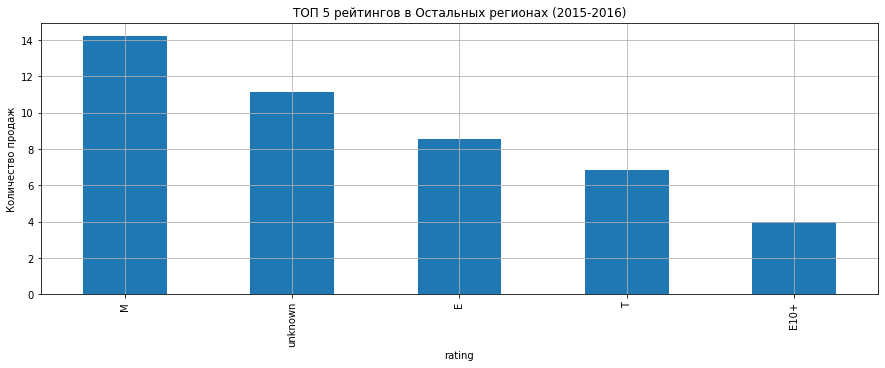

In [ ]:
user_portrait(data_actual, 'rating', 'other_sales', 'ТОП 5 рейтингов в Остальных регионах (2015-2016)')

**Наблюдение**

Пользователь остальных районов:

Топ 3 платформы:
 - PS4
 - XOne
 - PS3

Топ 3 Жанра
 - Shooter
 - Action
 - Sports

**Вывод**

В этой части выделим ТОП-3 самых популярных платформ и жанров.
Можем выделить, что каждый регион отличается топовыми позициями. Для примера разберем первые места.

По нашей таблице:

Рейтинг по платформам:
в Северной Америке - Xbox One
в Европе - PS4
в Японии - DS
в других странах - PS4

Рейтинг по жанрам:
в Северной Америке - Shooter
в Европе - Shooter
в Японии - Action
в других странах - Shooter

Вывод по рейтингам:
    
    В Северной Америке самые высокие рейтинги у жанра M («Для взрослых»), далее по популярности игры, в которых жанры неопределенны. Остальные жанры менее популярные.
    
    В Европе самые высокие рейтинги у жанра M («Для взрослых»), далее по популярности игры, в которых жанры неопределенны. Остальные жанры менее популярные.
    
    В Японии самые высокие рейтинги у игр, в которых жанры неопределенны, далее по популярности жанр M («Для взрослых»). Остальные жанры менее популярные.
    
    В других странах самые высокие рейтинги у жанра M («Для взрослых»), далее по популярности игры, в которых жанры неопределенны
    
Рейтинг от организации ESRB:
    
    -в Северной Америке - M
    -в Европе - M
    -в Японии - жанр неопределён
    -в других странах - M

Сложно сказать почему в Японии покупают чаще игры без рейтинга. В Японии живут очень интересные люди с необычными вкусами. Возможно, неопределённый жанр вызввает больший интерес, как раз из-за своей "скрытности" - это добавляет азарт при покупке?

Дело в том, что ESRB – это рейтинг США и игры выпущенные в Японии для локального рынка его не проходят.

## Проверка гипотез

**Гипотеза:**

Гипотезы проверены на актуальном периоде и сделаны новые выводы.
    
    1. Не можем отвергнуть нулевую гипотезу (Средние оценки пользователей по платформам равны)
    2. Отвергаем нулевую гипотезу (Средние оценки пользователей по жанрам равны)

In [ ]:
data_hypo = data_actual.query('critic_score != -1 and user_score != -1')

In [ ]:
data_pc = data_hypo[data_hypo['platform'] == 'PC']
data_xone = data_hypo[data_hypo['platform'] == 'XOne']

pc_1 = data_pc['user_score']
xone_1 = data_xone['user_score']

alpha = .05

result = st.ttest_ind(
    pc_1,
    xone_1
)

print(f'P-value = {result.pvalue}')

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

P-value = 0.3280257221394691
Не можем отвергнуть нулевую гипотезу


**Наблюдение**

Изначально гипотеза звучит так, наши выборки равны. По результатам статистического теста - нулевая гипотеза потверждается.

**Гипотеза:**

- Нулевая гипотеза - средние оценки пользователей по жанрам (Action и Sport) равны
- Альтернативная гипотеза - средние оценки пользователей по жанрам (Action и Sport) разные

In [ ]:
data_action = data_hypo[data_hypo['genre'] == 'Action']
data_sport = data_hypo[data_hypo['genre'] == 'Sports']

action = data_action['user_score']
sport = data_sport['user_score']

alpha = .05

result = st.ttest_ind(
    action,
    sport
)

print(f'pvalue - {result.pvalue}')

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можеи отвергнуть нулевую гипотезу')

pvalue - 3.5087325539494814e-07
Отвергаем нулевую гипотезу


**Наблюдение**

Изначально гипотеза звучит так, наши выборки равны. По результатам статистического теста - нулевая гипотеза отвергается.

**Вывод:**

В первой гипотезе:
Результат говорит о том, что нулевая гипотеза потверждается.
p-значение: 0.3280257221394691

Во второй гипотезе:
Результат говорит о том, что нулевая гипотеза отвергается и принимается альтернативная - средние оценки пользователей по жанрам (Action и Sport) **разные**.
p-значение: 3.5087325539494814e-07


## Вывод

По итогам можно сделать прогноз на 2017 год в игровой индустрии.

Был анализирован период с 2015-2016 года, и в этот период для диагностики у нас были выбраны 2 платформы: PS4 и Xbox One, которые на этот момент обладали самыми большими продажами и были в тренде.

Самыми популярными платформами на рынке в мире являются - PS4, т.к. из из всех стран, только Северная Америка склоняется к Xbox One.

Жанры игр страны предпочитают разные, но большинство склоняется к жанру Shooter.

А вот ТОП рейтинг от организации ESRB можно твердо считать категорию M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет).

На следующий год ставку можно делать на платформу PS4, т.к. она популярна в большинстве стран мира. В жанрах ТОП Shooter, но предлагаю не забывать про остальные два жанра, т.к. они захватываю две большие страны

В конце проекта нам необходимо было проверить две гипотезы: "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "средние пользовательские рейтинги жанров Action и Sports разные". Итог можно сделать следующий: средние пользовательские рейтинги платформ равны, и средние пользовательские рейтинги по жанрам разные.